In [3]:
import numpy as np
import matplotlib.pyplot as plt

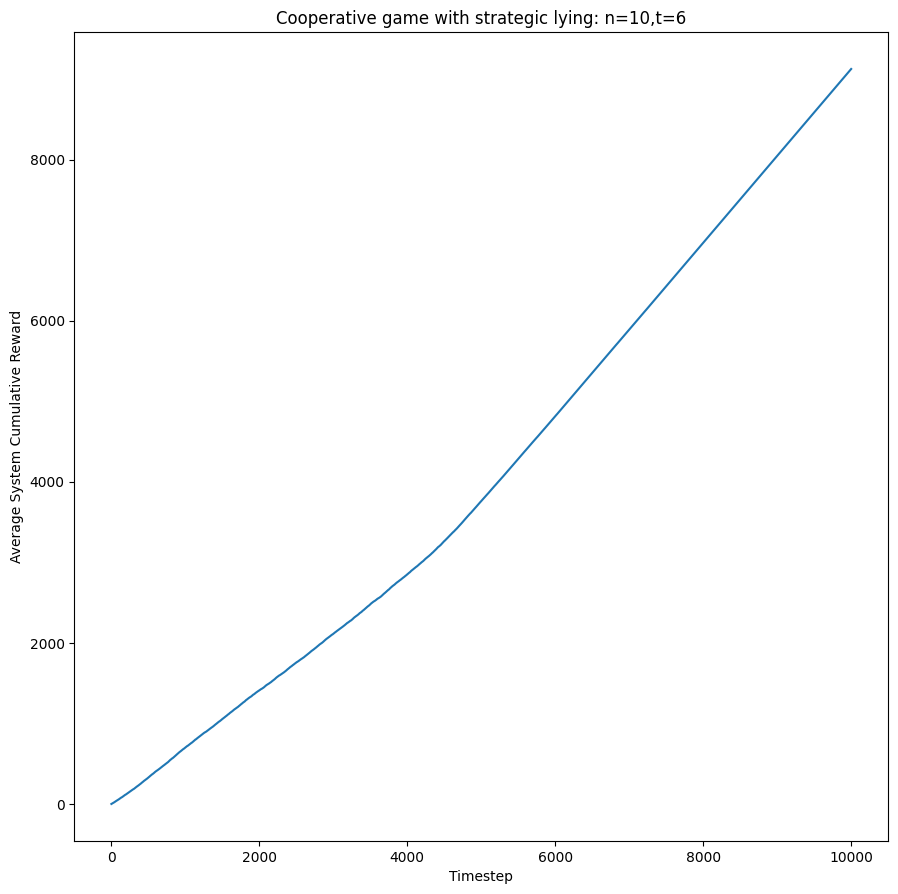

In [6]:
# load simulation results
cum_rew_1 = np.load(f'data/base_model/n10t6_cum_rew_cnf0.npy')
# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={10},t={6}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')

plt.plot(cum_rew_1)

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)